## Importing the Needed Libraries

In [2]:
#Before we perform any EDA we need certain libraries on order to begin
#import needed libraries for this Projects

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#It is a magic function that renders the figure in a notebook (instead of displaying a dump of the figure object)
%matplotlib inline

## Loading the Data

In [3]:
#I didn't need the id and name column so I deleted them before reading the data.
shootings_data = pd.read_csv('shootings.csv',parse_dates=True,index_col='date').drop(['id','name'],axis=1)

#Read the first top 5 rows of the data
shootings_data.head()

,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
date,,,,,,,,,,,,
2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


## Data Preprocessing

In [4]:
#The info() method prints information about the DataFrame
shootings_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4895 entries, 2015-01-02 to 2020-06-15
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   manner_of_death          4895 non-null   object 
 1   armed                    4895 non-null   object 
 2   age                      4895 non-null   float64
 3   gender                   4895 non-null   object 
 4   race                     4895 non-null   object 
 5   city                     4895 non-null   object 
 6   state                    4895 non-null   object 
 7   signs_of_mental_illness  4895 non-null   bool   
 8   threat_level             4895 non-null   object 
 9   flee                     4895 non-null   object 
 10  body_camera              4895 non-null   bool   
 11  arms_category            4895 non-null   object 
dtypes: bool(2), float64(1), object(9)
memory usage: 430.2+ KB


From the above method used, I observed that none of the columns had any missing values. Each column can was full witht the values 4895.

In [5]:
#Finding for individual columns which contains numeric values
shootings_data.arms_category.value_counts()

Guns                     2764
Sharp objects             818
Unknown                   418
Unarmed                   348
Other unusual objects     192
Blunt instruments         122
Vehicles                  121
Multiple                   54
Piercing objects           29
Electrical devices         24
Explosives                  4
Hand tools                  1
Name: arms_category, dtype: int64

From the above information, I observed that guns are used largely for the shootings with a value 2764 and hand tools had the lowest of the tools been used with a value of 1. There are some unknown objects used as well with the value of 418.

In [6]:
#We will convert arms_category column value in 4 categories depending on their danger level.
danger_level_dict ={'Danger Level 1': ['Other unusual objects','Unknown','Unarmed'],
                    'Danger Level 2': ['Electrical devices','Hand tools'],
                    'Danger Level 3': ['Blunt instruments','Sharp objects','Piercing objects'],
                    'Danger Level 4': ['Vehicles','Explosives','Multiple','Guns']}

In [9]:
#looping through the just created data
for danger_level,arms_cat in danger_level_dict.items():
      for cat in arms_cat:
        shootings_data.loc[shootings_data.arms_category == cat,'arms_category'] = danger_level

In [10]:
#The just created data with columns which contains numeric values
shootings_data.arms_category.value_counts()

Danger Level 4    2943
Danger Level 3     969
Danger Level 1     958
Danger Level 2      25
Name: arms_category, dtype: int64

In [11]:
#This counts the number of people in a particular race
shootings_data.race.value_counts()

White       2476
Black       1298
Hispanic     902
Asian         93
Native        78
Other         48
Name: race, dtype: int64

From the information above, whites have the highest of the races followed by blacks,hispanic,asian,native and other with the values 2476,1298,902,93,78,48 and 48 respectively.

In [12]:
#Reading the values for the year 2020
shootings_data.loc['2020'].count()

manner_of_death            374
armed                      374
age                        374
gender                     374
race                       374
city                       374
state                      374
signs_of_mental_illness    374
threat_level               374
flee                       374
body_camera                374
arms_category              374
dtype: int64

From the year 2020, all the columns recorded the same values for all which is 374.

In [17]:
#Reading the values for the years 2015 and 2019

shootings_data = shootings_data.loc['2015':'2019']


In [19]:
#We will be using only data from 2015 to 2019 as 2020 data is not present for entire year and using 2020 data it might effect our analysis
#I will check this later on
shootings_data['year'] = shootings_data.index.year
shootings_data['quarter'] = shootings_data.index.quarter
shootings_data['month'] = shootings_data.index.month_name()

C:\Users\Ampah\AppData\Local\Temp/ipykernel_11296/2297597746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shootings_data['year'] = shootings_data.index.year
C:\Users\Ampah\AppData\Local\Temp/ipykernel_11296/2297597746.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shootings_data['quarter'] = shootings_data.index.quarter
C:\Users\Ampah\AppData\Local\Temp/ipykernel_11296/2297597746.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [20]:
#Deleting a particular column using drop
# I will check this later on
shootings_data.drop('armed',axis=1,inplace=True)

C:\Users\Ampah\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [21]:
shootings_data.head()

,manner_of_death,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,year,quarter,month
date,,,,,,,,,,,,,,
2015-01-02,shot,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Danger Level 4,2015,1,January
2015-01-02,shot,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Danger Level 4,2015,1,January
2015-01-03,shot and Tasered,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Danger Level 1,2015,1,January
2015-01-04,shot,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Danger Level 1,2015,1,January
2015-01-04,shot,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Danger Level 3,2015,1,January


## Data Visualization

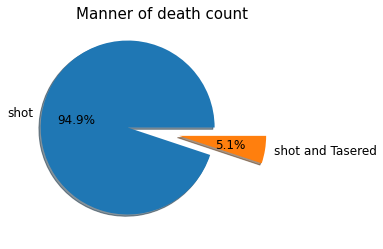

In [22]:
#Giving a visualization of the column manner_of_death
shootings_data.manner_of_death.value_counts().plot.pie(autopct='%1.1f%%',fontsize=12,shadow=True,explode=[0.4,0.2])
plt.title("Manner of death count",fontsize=15)
plt.ylabel('')
plt.show()

From the information above, it can be concluded that most people are killed through a shot and the rest through a shot and tasered approaches. Most Police find shotting as a simple means of killing. 

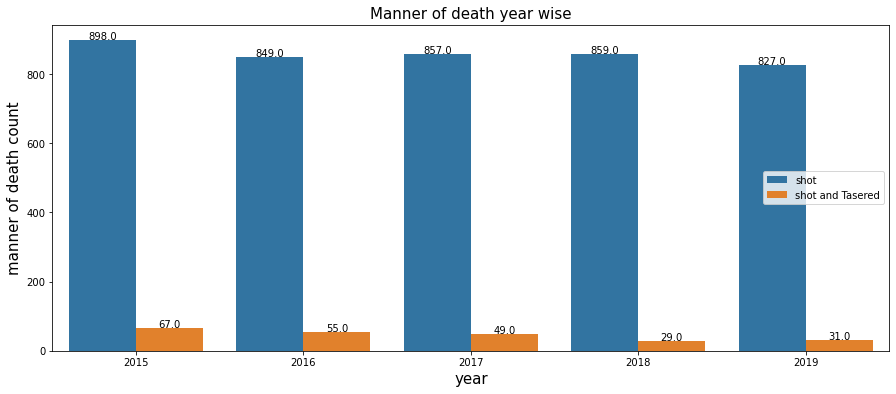

In [23]:
#Visualizing the manner of death based on years
plt.figure(figsize=(15,6))
ax = sns.barplot(x='year',y='age',hue='manner_of_death',data=shootings_data.groupby(['year','manner_of_death'],as_index=False).age.count())
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()+10),ha = 'center', va = 'center')
plt.legend(loc='center right')
plt.xlabel('year',size=15)
plt.ylabel('manner of death count',size=15)
plt.title('Manner of death year wise',size=15)
plt.show()

From the information above, 2015 recorded the highest number of manner of death count with 2019 showing the lowest number of manner of death count. From the chart, manner of death count is identified by y-axis and the year by the x-axis.The colors in the graph also shows the manner of death.

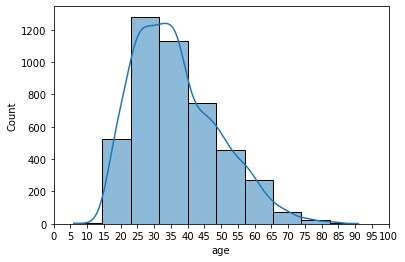

In [24]:
#Visualizing the number of count by the age category
sns.histplot(shootings_data.age,bins=10,kde=True)
plt.xticks((range(0,101,5)))
plt.show()

From the above information, I oberserved that majority of data lie between age group 27 - 45.People between the ages of 74-90 are mostly the lowest in terms of the killing.

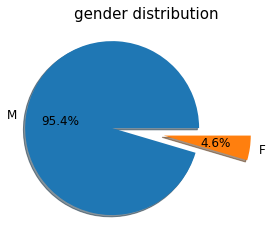

In [25]:
# Visualizing the gender mostly killed
shootings_data.gender.value_counts().plot.pie(autopct='%1.1f%%',fontsize=12,shadow=True,explode=[0.4,0.2])
plt.title("gender distribution",fontsize=15)
plt.ylabel('')
plt.show()

It can be seen clearly from the output that, most males are killed as compared to females.

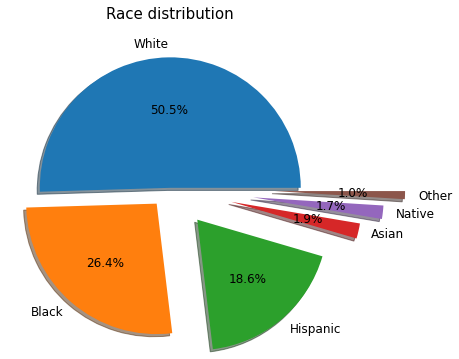

In [27]:
#The type of race that are mostly affected.
plt.figure(figsize=(10,6))
shootings_data.race.value_counts().plot.pie(autopct='%1.1f%%',fontsize=12,shadow=True,explode=np.linspace(0,0.8,6))
plt.title("Race distribution",fontsize=15)
plt.ylabel('')
plt.show()

50.5% of shootings were of White race

C:\Users\Ampah\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1616: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


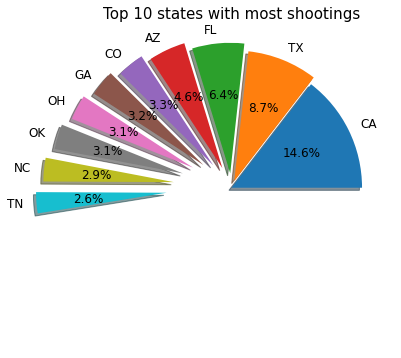

In [28]:
#Visualizing the states where each activities took place
plt.figure(figsize=(10,6))
shootings_data.state.value_counts(normalize=True)[:10].plot.pie(autopct='%1.1f%%',fontsize=12,shadow=True,explode=np.linspace(0,0.5,10))
plt.title("Top 10 states with most shootings",fontsize=15)
plt.ylabel('')
plt.show()

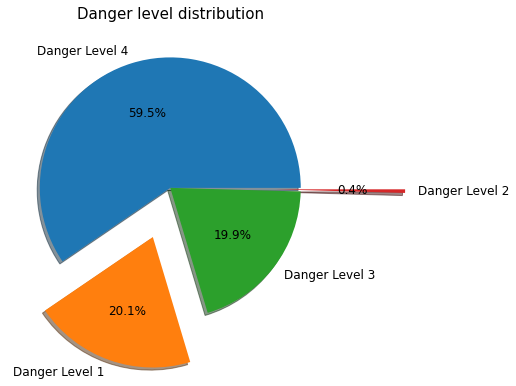

In [29]:
#Visualizing danger level based on arms category
plt.figure(figsize=(10,6))
shootings_data.arms_category.value_counts()[:10].plot.pie(autopct='%1.1f%%',fontsize=12,shadow=True,explode=[0,0.4,0,0.8])
plt.title("Danger level distribution",fontsize=15)
plt.ylabel('')
plt.show()

From the above information, 20% of shootings were of people with low danger.

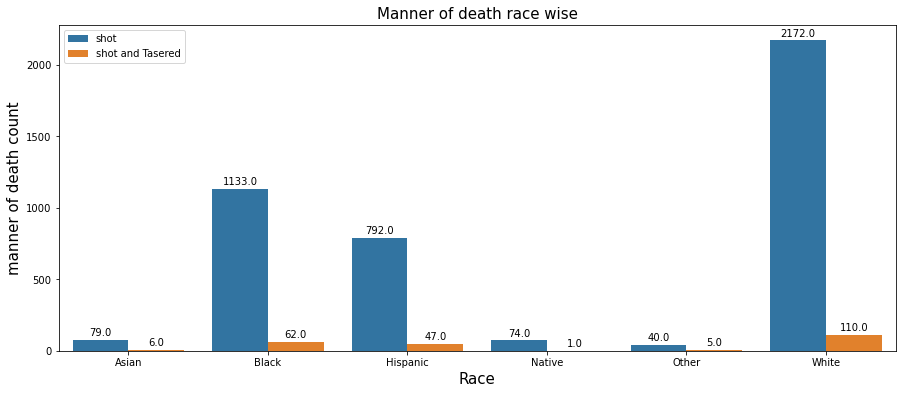

In [30]:
#
plt.figure(figsize=(15,6))
ax = sns.barplot(x='race',y='age',hue='manner_of_death',data=(shootings_data.groupby(['race','manner_of_death'],as_index=False).age.count()))
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()+50),ha = 'center', va = 'center')
plt.legend(loc='upper left')
plt.xlabel('Race',size=15)
plt.ylabel('manner of death count',size=15)
plt.title('Manner of death race wise',size=15)
plt.show()

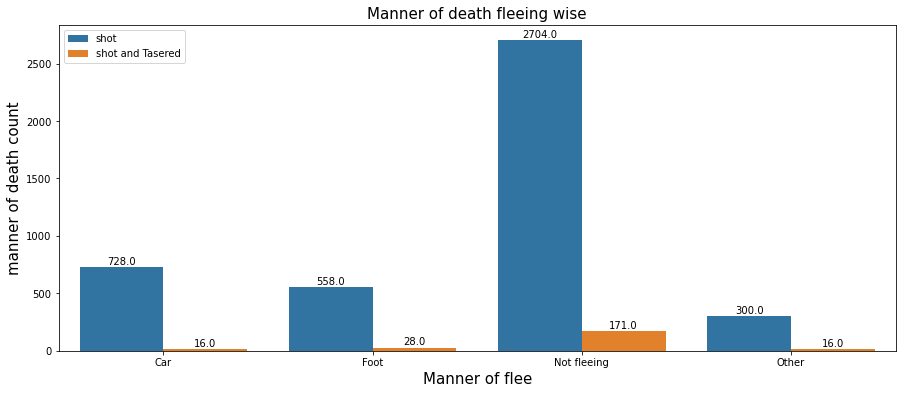

In [31]:
#
plt.figure(figsize=(15,6))
ax = sns.barplot(x='flee',y='age',hue='manner_of_death',data=(shootings_data.groupby(['flee','manner_of_death'],as_index=False).age.count()))
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()+50),ha = 'center', va = 'center')
plt.legend(loc='upper left')
plt.xlabel('Manner of flee',size=15)
plt.ylabel('manner of death count',size=15)
plt.title('Manner of death fleeing wise',size=15)
plt.show()

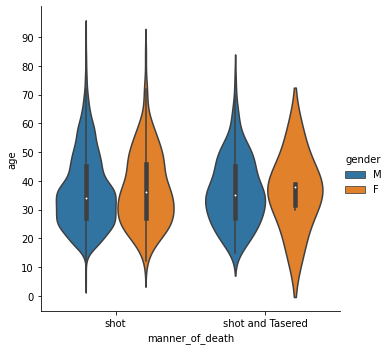

In [32]:
#
sns.catplot(x="manner_of_death", y="age",hue='gender', kind="violin",data=shootings_data)
plt.yticks(np.arange(0,100,10))
plt.show()

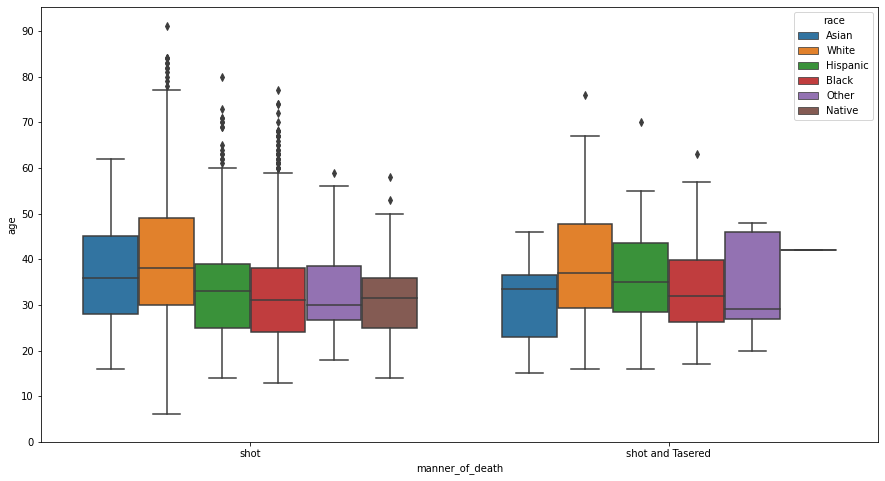

In [33]:
#
plt.figure(figsize=(15,8))
sns.boxplot(x="manner_of_death", y="age",hue='race',data=shootings_data)
plt.yticks(np.arange(0,100,10))
plt.show()

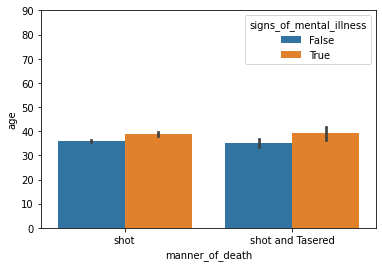

In [34]:
#
sns.barplot(x="manner_of_death", y="age",hue='signs_of_mental_illness',data=shootings_data)
plt.yticks(np.arange(0,100,10))
plt.show()

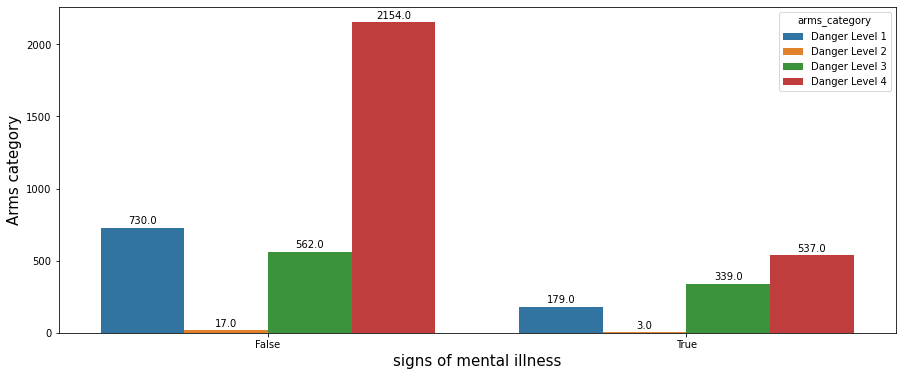

In [35]:
#
plt.figure(figsize=(15,6))
ax = sns.barplot(x='signs_of_mental_illness',y='age',hue='arms_category',data=(shootings_data.groupby(['signs_of_mental_illness','arms_category'],as_index=False).age.count()))
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()+50),ha = 'center', va = 'center')
plt.xlabel('signs of mental illness',size=15)
plt.ylabel('Arms category',size=15)
plt.show()

People with mental illness were equipped with high danger levels.

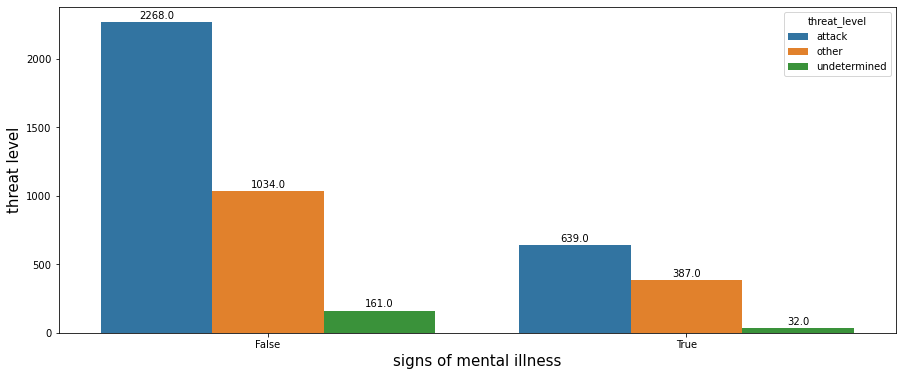

In [36]:
#
plt.figure(figsize=(15,6))
ax = sns.barplot(x='signs_of_mental_illness',y='age',hue='threat_level',data=(shootings_data.groupby(['signs_of_mental_illness','threat_level'],as_index=False).age.count()))
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()+50),ha = 'center', va = 'center')
plt.xlabel('signs of mental illness',size=15)
plt.ylabel('threat level',size=15)
plt.show()

People with mental illness mostly attacked the officer than other and undetermined.

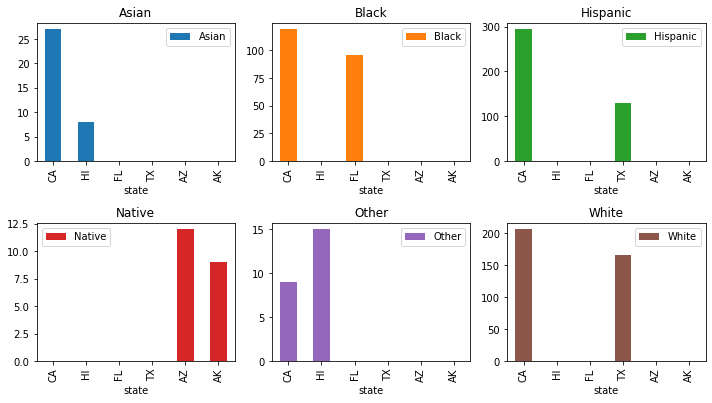

In [37]:
#
shootings_data.state.groupby(shootings_data['race']).value_counts().groupby(level=0).head(2).unstack(level=0).plot(kind='bar',
                                                                                                                   subplots=True, layout=(3, 3),sharex=False, figsize=(10,8))
plt.tight_layout()

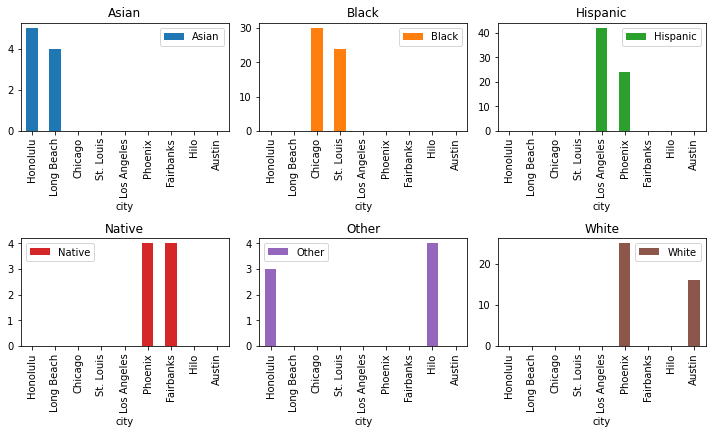

In [38]:
#
shootings_data.city.groupby(shootings_data['race']).value_counts().groupby(level=0).head(2).unstack(level=0).plot(kind='bar',
                                                                                                                   subplots=True, layout=(3, 3),sharex=False, figsize=(10,8))
plt.tight_layout()

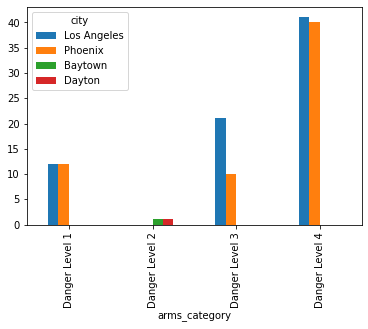

In [39]:
#
shootings_data.city.groupby(shootings_data['arms_category']).value_counts().groupby(level=0).head(2).unstack(level=1).plot.bar()
plt.show()


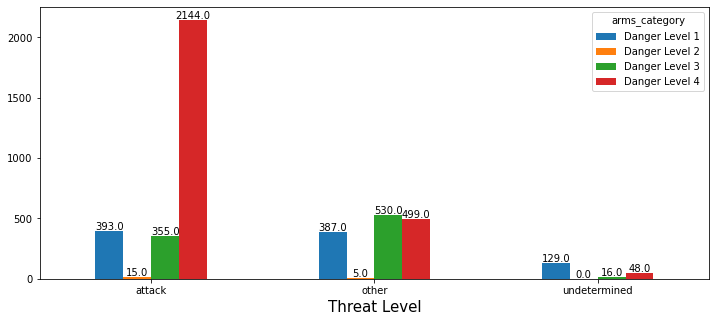

In [40]:
#
ax = shootings_data.arms_category.groupby(shootings_data['threat_level']).value_counts().unstack().plot.bar(figsize=(12,5))
for p in ax.patches:
  ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()+35),ha = 'center', va = 'center')
plt.xlabel('Threat Level',size=15)
plt.xticks(rotation=0)
plt.show()

From above graph we can notice that people with high danger levels attacked officer.

In [41]:
#
shootings_data.groupby(['threat_level','arms_category','signs_of_mental_illness']).age.count().unstack(level=2)

signs_of_mental_illness      False  True
threat_level arms_category              
attack       Danger Level 1    288   105
             Danger Level 2     14     1
             Danger Level 3    241   114
             Danger Level 4   1725   419
other        Danger Level 1    327    60
             Danger Level 2      3     2
             Danger Level 3    311   219
             Danger Level 4    393   106
undetermined Danger Level 1    115    14
             Danger Level 3     10     6
             Danger Level 4     36    12

In [45]:
#Exporting the work into a separate file
shootings_data.to_csv('eda_shootings.csv',header=False, index=False)